In [7]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
%matplotlib inline

In [35]:
sales_of_company_x = pd.read_csv("Series/monthly-sales-of-company-x-jan-6.csv")
robberies_in_boston = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")
airlines_passengers = pd.read_csv("Series/international-airline-passengers.csv")
mean_monthly_temp = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")
dowjones_closing = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")
female_births = pd.read_csv("Series/daily-total-female-births-in-cal.csv")

In [36]:
all_series = {
    "Monthly sales of company X": sales_of_company_x["Count"],
    "Monthly Boston armed robberies": robberies_in_boston["Count"],
    "International airline passengers: monthly totals in thousands": airlines_passengers["Count"],
    "Mean monthly air temperature (Deg. F) Nottingham Castle": mean_monthly_temp["Deg"],
    "Weekly closings of the Dow-Jones industrial average": dowjones_closing["Close"],
    "Daily total female births in California": female_births["Count"]
}

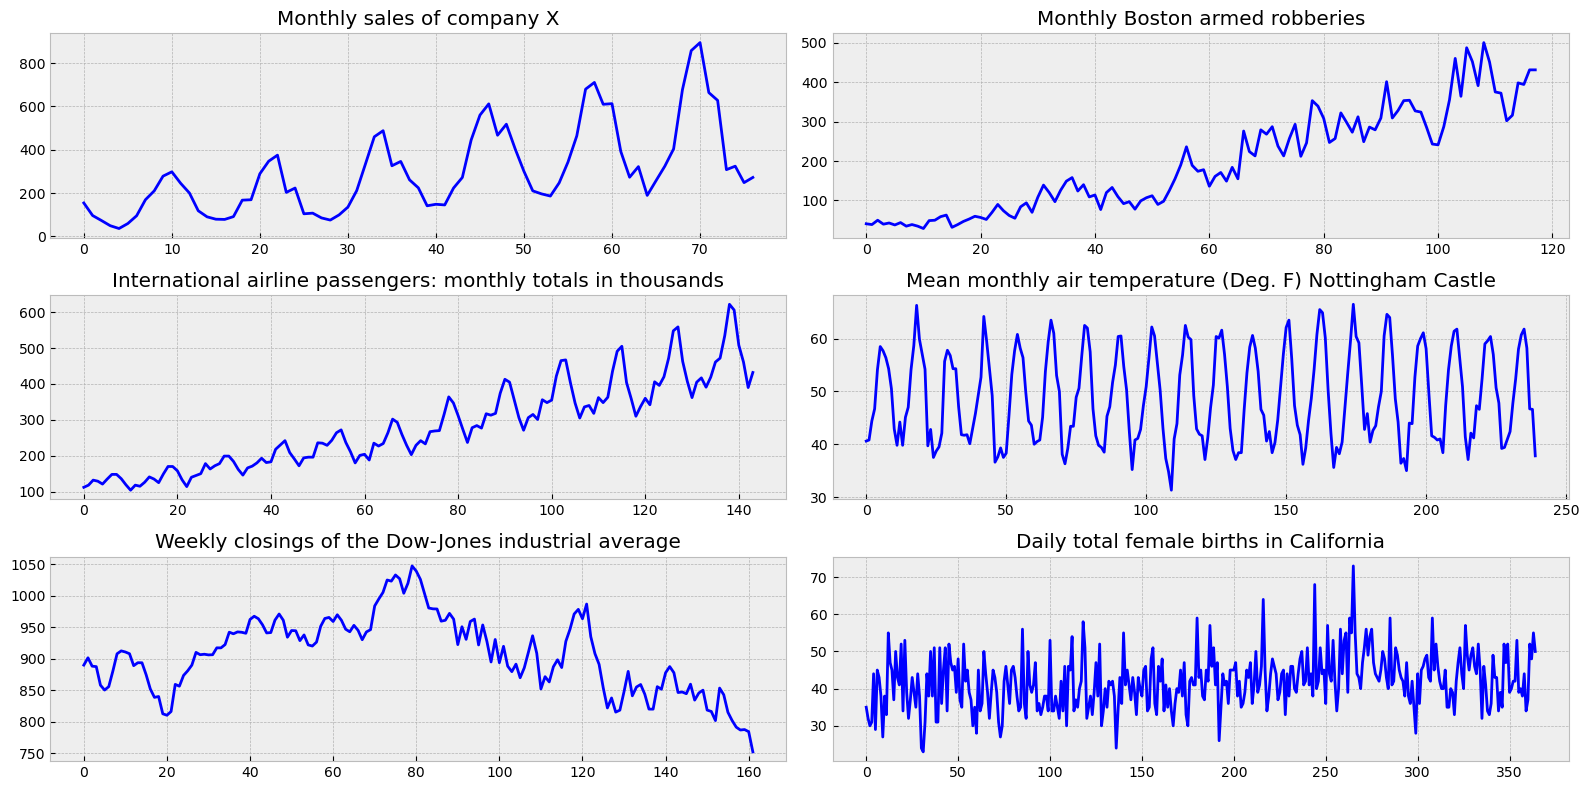

In [5]:
with plt.style.context('bmh'):
    plt.figure(figsize=(16, 8))
    layout = (3, 2)
    for i, key in enumerate(all_series.keys()):
        x = i % 2
        y = int((i - x) / 2)
        
        ts_ax = plt.subplot2grid(layout, (y, x))
        all_series[key].plot(ax=ts_ax, color='blue')
        ts_ax.set_title(key)
        
    plt.tight_layout()

По визуальному анализу только последний график может быть стационарным.


Функции для проверки стационарности:

In [8]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [9]:
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

# 1. monthly sales of company x

###### Проверяем на стационарность ряд без обработки

In [12]:
series = pd.read_csv("Series//monthly-sales-of-company-x-jan-6.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                  0.654715
p-value                         0.988889
#Lags Used                     12.000000
Number of Observations Used    64.000000
Critical Value (1%)            -3.536928
Critical Value (5%)            -2.907887
Critical Value (10%)           -2.591493
dtype: float64


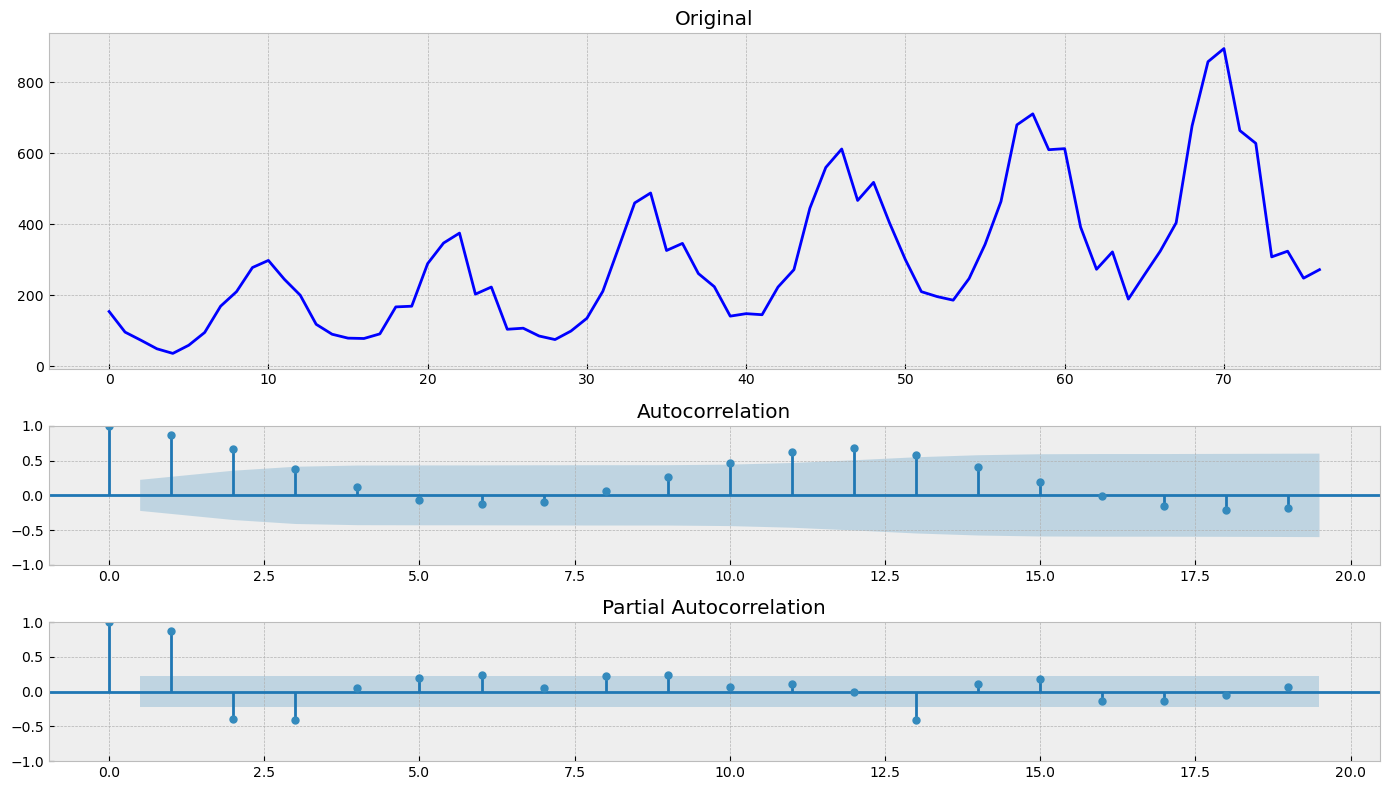

In [14]:
tsplot(series) #если p-value меньше чем 0.5, значит временной ряд стационарен

На графике автокорреляции самый большой пик на лаге 12.

Попробуем сделать временной ряд стационарным. Для начала уберем изменение дисперсии при помощи преобразования Бокса-Кокса

###### Дисперсия - преборазование бокса-кокса

In [15]:
series = boxcox(all_series["Monthly sales of company X"], 0) 
#0 это лямбда, если она равна 0, то это обычное логарифмирование

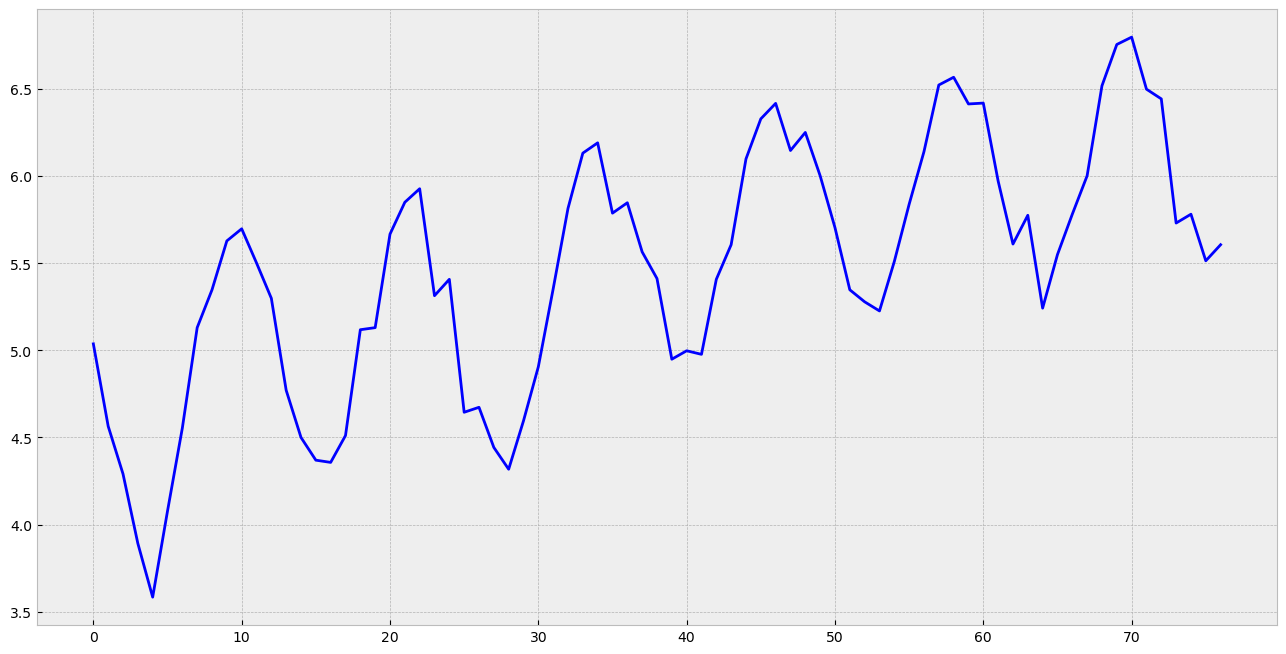

In [16]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

In [ ]:
#разброс стал одинаковым на протяжении всего графика

###### Дифференцируем

In [ ]:
#дифференцирование позволяет избавиться от тренда и сезонности

In [20]:
series = np.diff(series, 1) #1 - кол-во дифференцирований
#другая форма записи, чтобы дифференцировать с лагами (например, избавиться от сезонности)
#series[12:] - series[:-12]

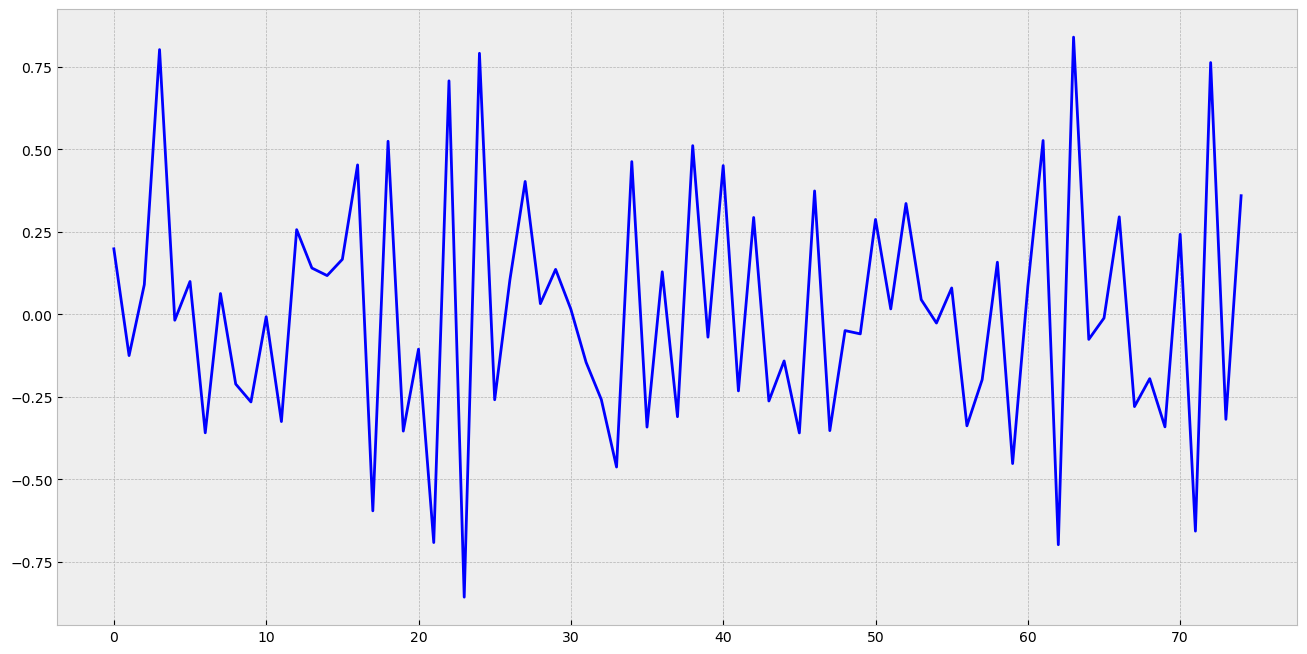

In [19]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

##### Убираем сезонность

In [21]:
series = series[12:] - series[:-12]

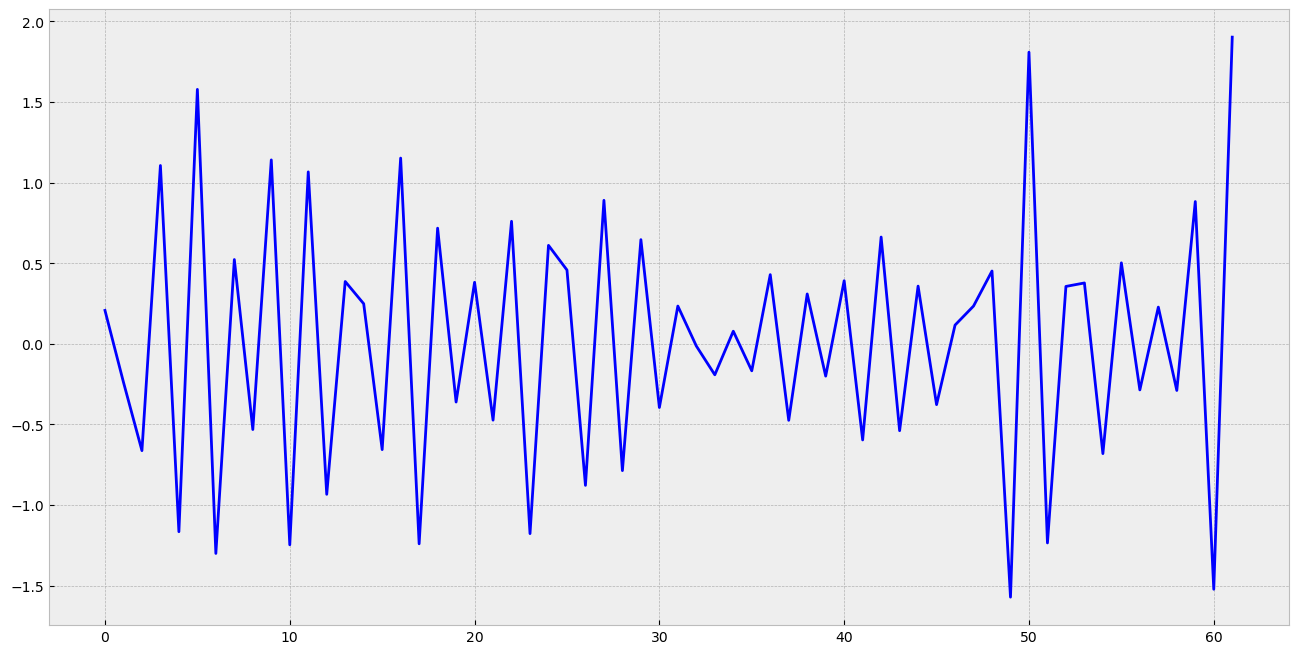

In [22]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

##### Проверяем на стационарность

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


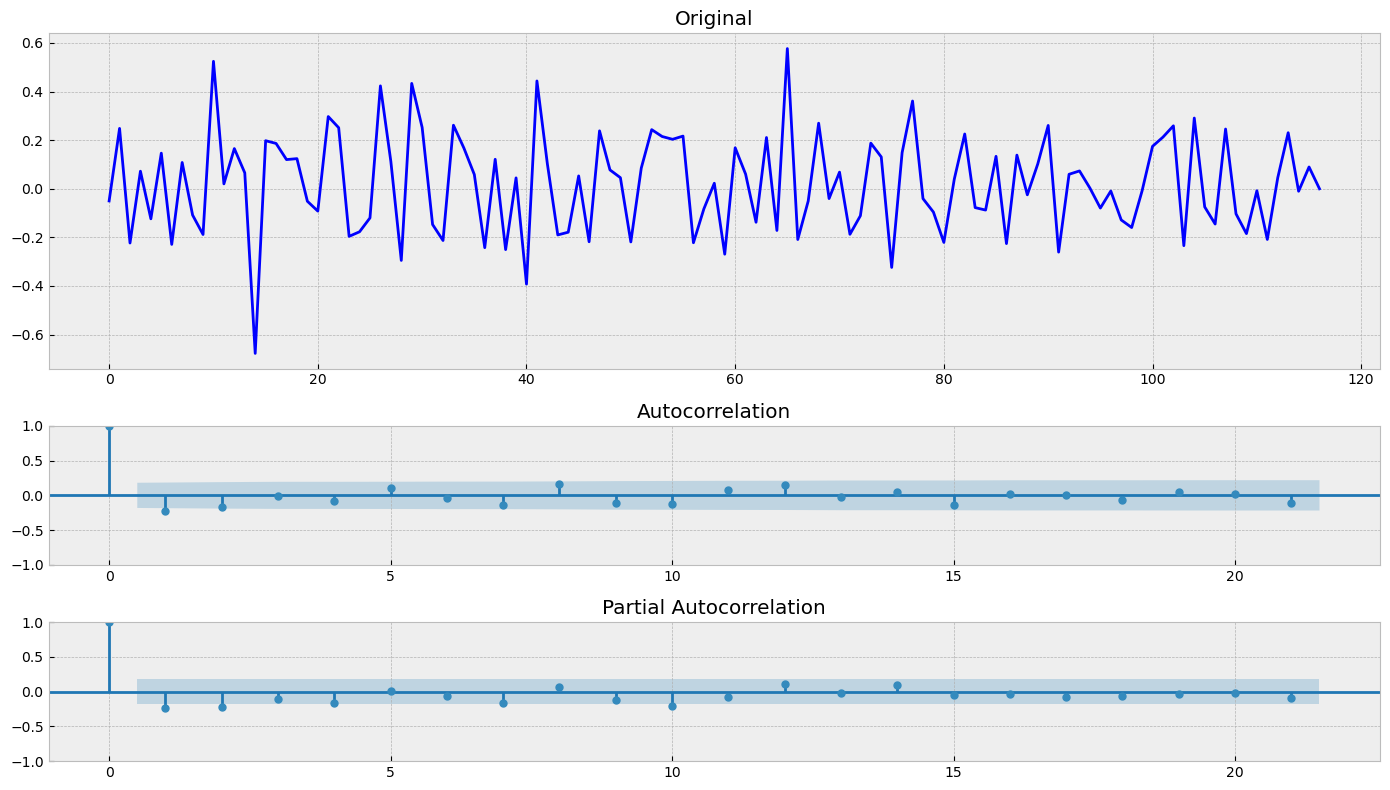

In [34]:
tsplot(series)

p-value меньше 0,05 

Отлично, с первым графиком разобрались.

# 2. Monthly Boston armed robberies (вооруженные ограбления)

###### Проверяем на стационарность ряд без обработки

In [37]:
series = pd.read_csv("Series/monthly-boston-armed-robberies-j.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   1.001102
p-value                          0.994278
#Lags Used                      11.000000
Number of Observations Used    106.000000
Critical Value (1%)             -3.493602
Critical Value (5%)             -2.889217
Critical Value (10%)            -2.581533
dtype: float64


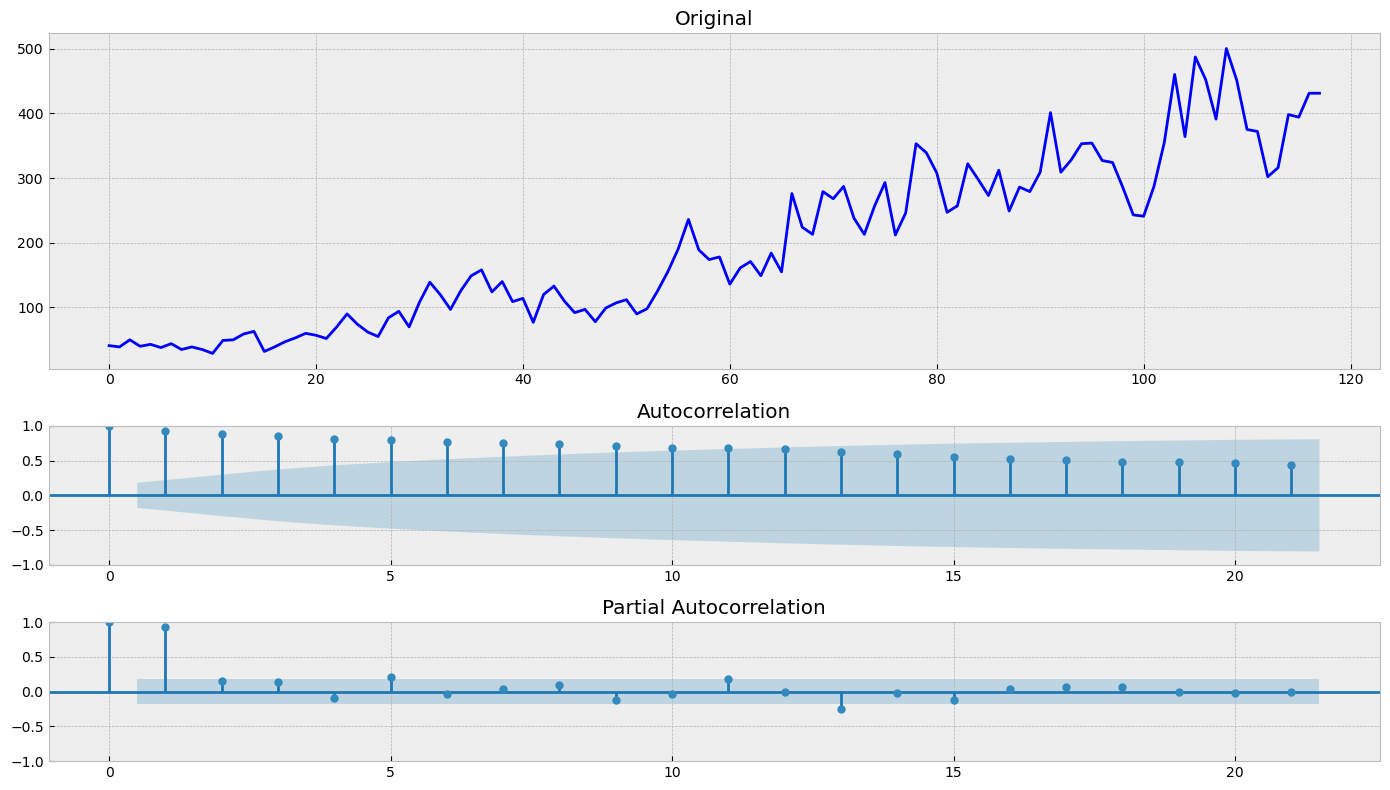

In [38]:
tsplot(series) #если p-value меньше чем 0.5, значит временной ряд стационарен

Сезонности, как и цикличности, не вижу.
Зато явно виден тренд.

###### Дисперсия - преборазование бокса-кокса

In [39]:
series = boxcox(all_series["Monthly Boston armed robberies"], 0) 
#0 это лямбда, если она равна 0, то это обычное логарифмирование

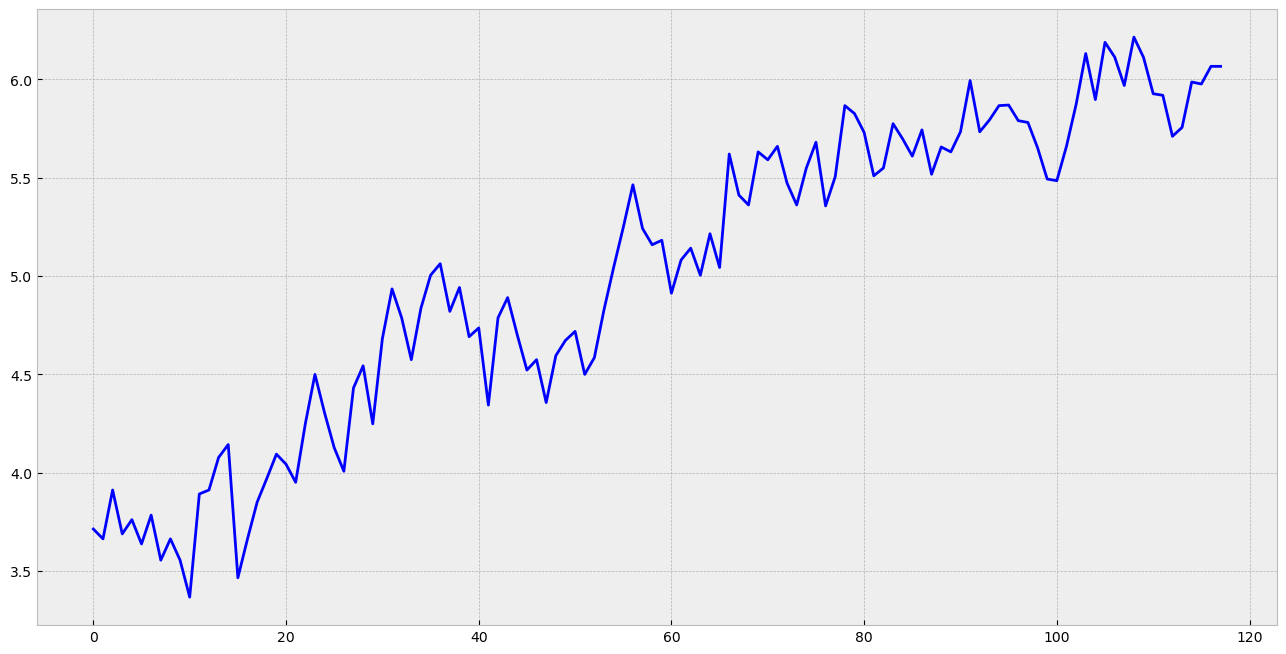

In [40]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

###### Дифференцируем

In [41]:
series = np.diff(series, 1)

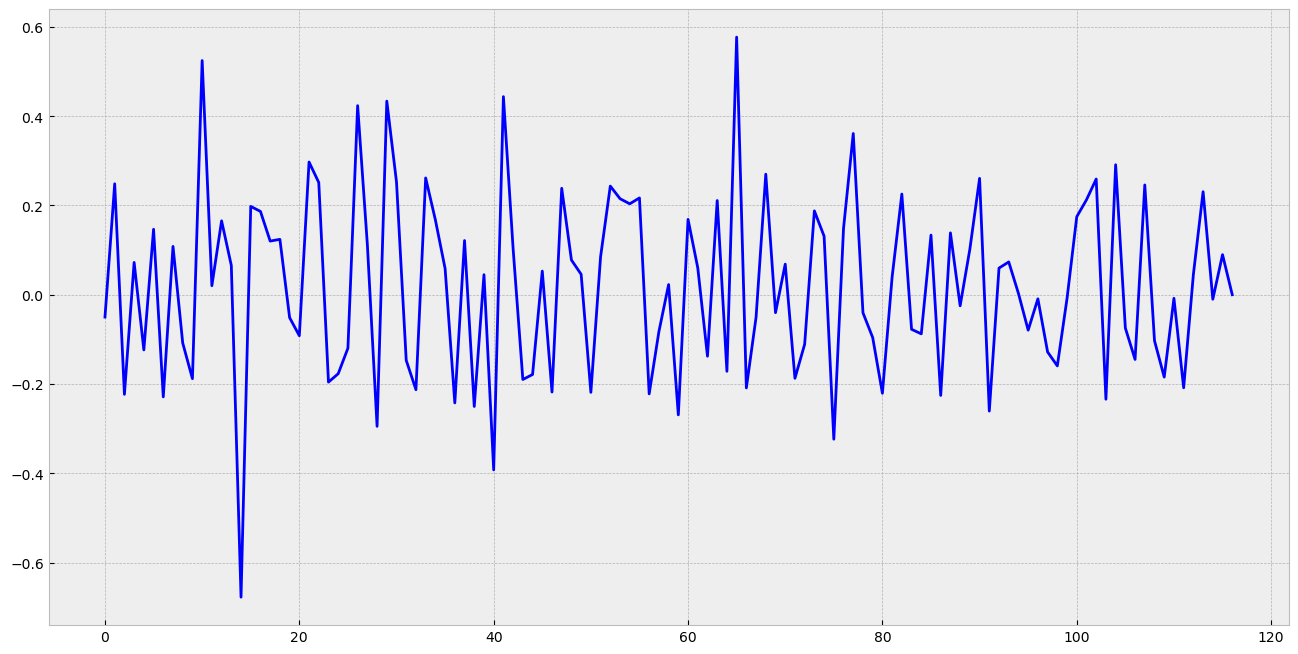

In [42]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

Сезонности я тут не увидела, поэтому сразу проверяем:

Results of Dickey-Fuller Test:
Test Statistic                -7.601792e+00
p-value                        2.378602e-11
#Lags Used                     3.000000e+00
Number of Observations Used    1.130000e+02
Critical Value (1%)           -3.489590e+00
Critical Value (5%)           -2.887477e+00
Critical Value (10%)          -2.580604e+00
dtype: float64


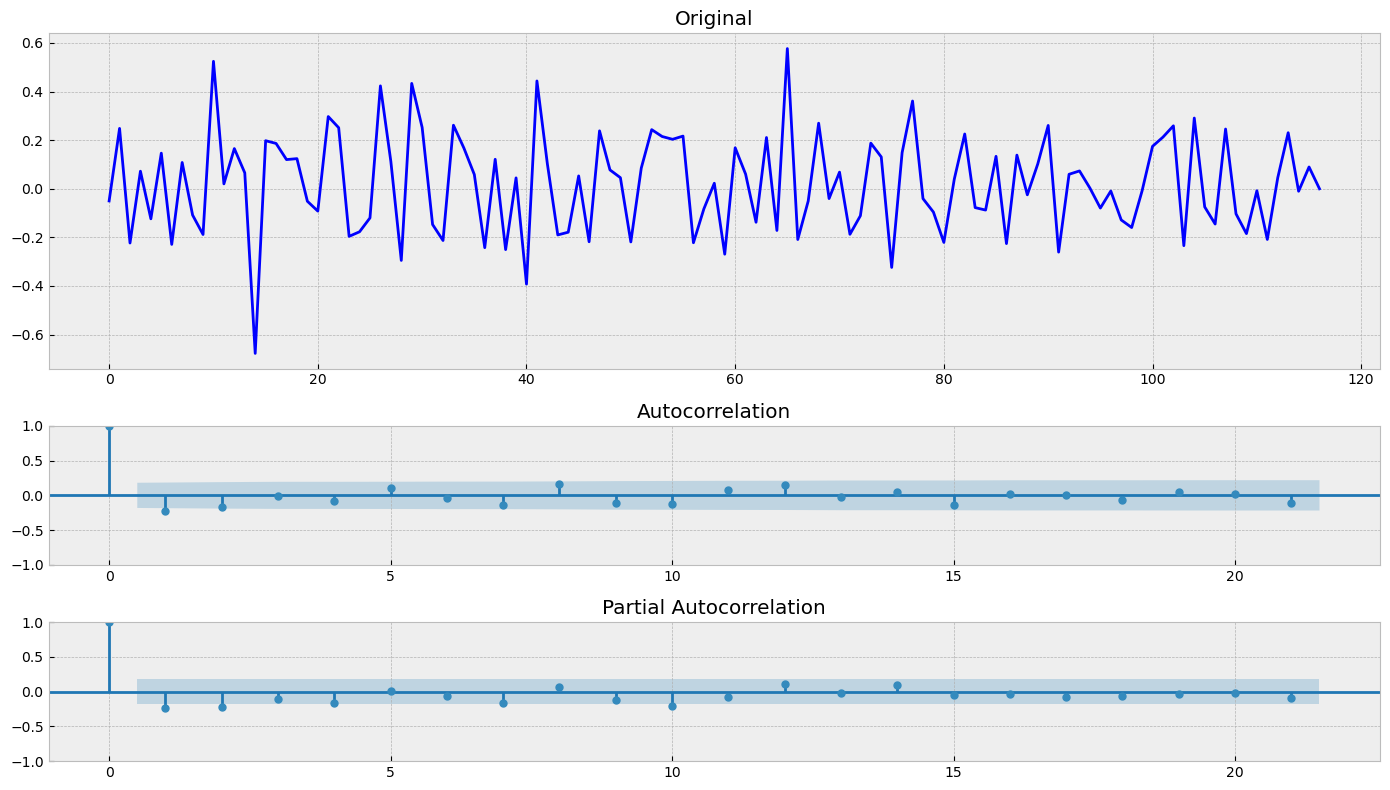

In [43]:
tsplot(series)

Отлично, p-value стремится к нулю

# 3. international airline passengers

In [44]:
series = pd.read_csv("Series/international-airline-passengers.csv")['Count']

Results of Dickey-Fuller Test:
Test Statistic                   0.815369
p-value                          0.991880
#Lags Used                      13.000000
Number of Observations Used    130.000000
Critical Value (1%)             -3.481682
Critical Value (5%)             -2.884042
Critical Value (10%)            -2.578770
dtype: float64


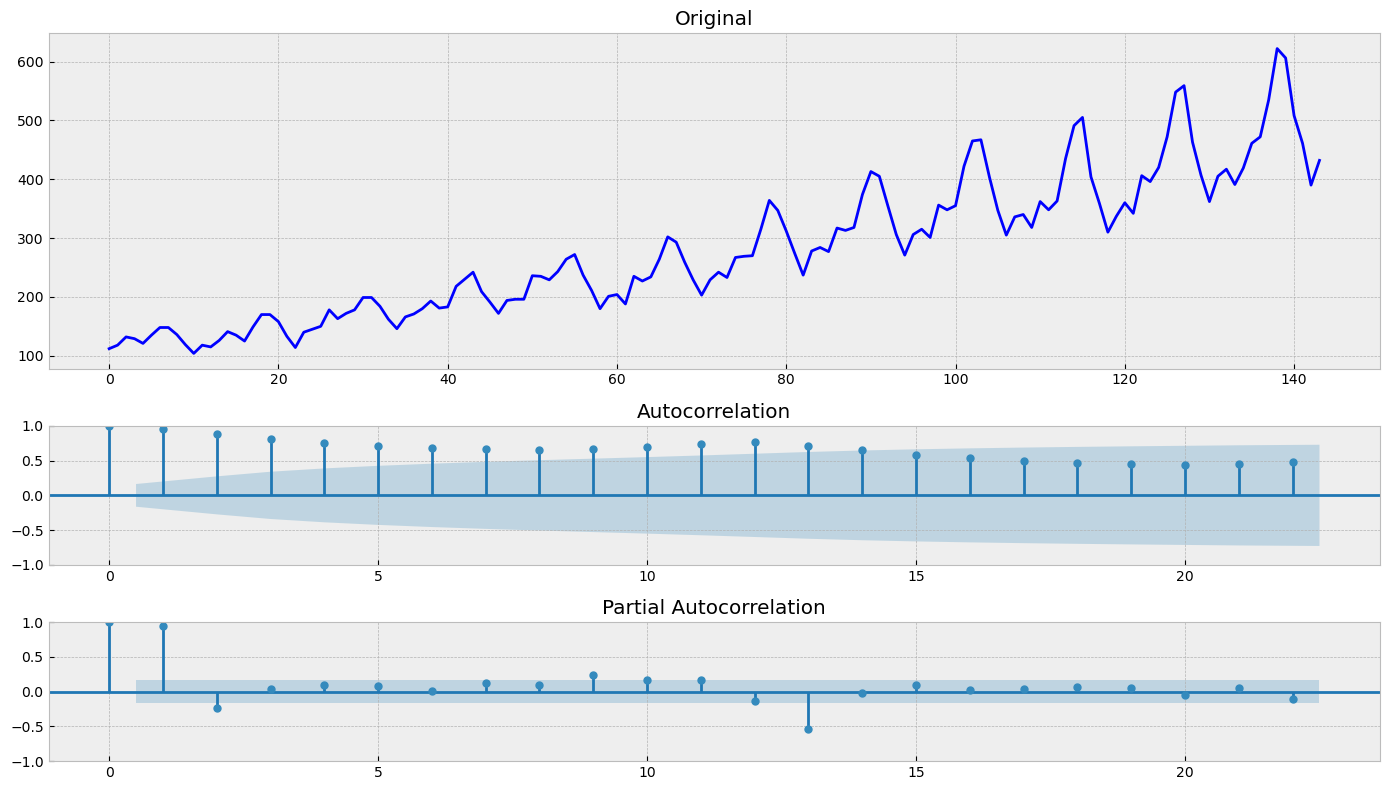

In [45]:
tsplot(series)

Видна сезонность на 12, но не так ярко выражена. Есть тренд и высокий разброс значений с течением времени.

###### Дисперсия

In [46]:
series = boxcox(all_series["International airline passengers: monthly totals in thousands"], 0) 

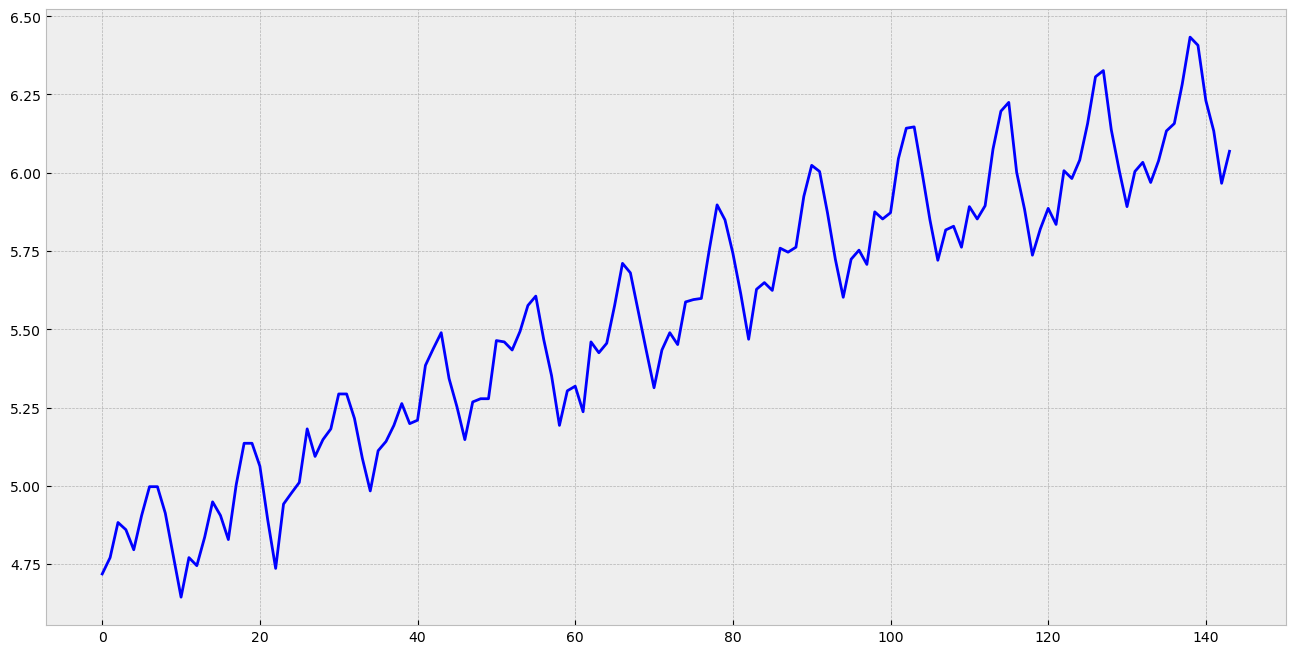

In [47]:
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

###### Дифференцируем

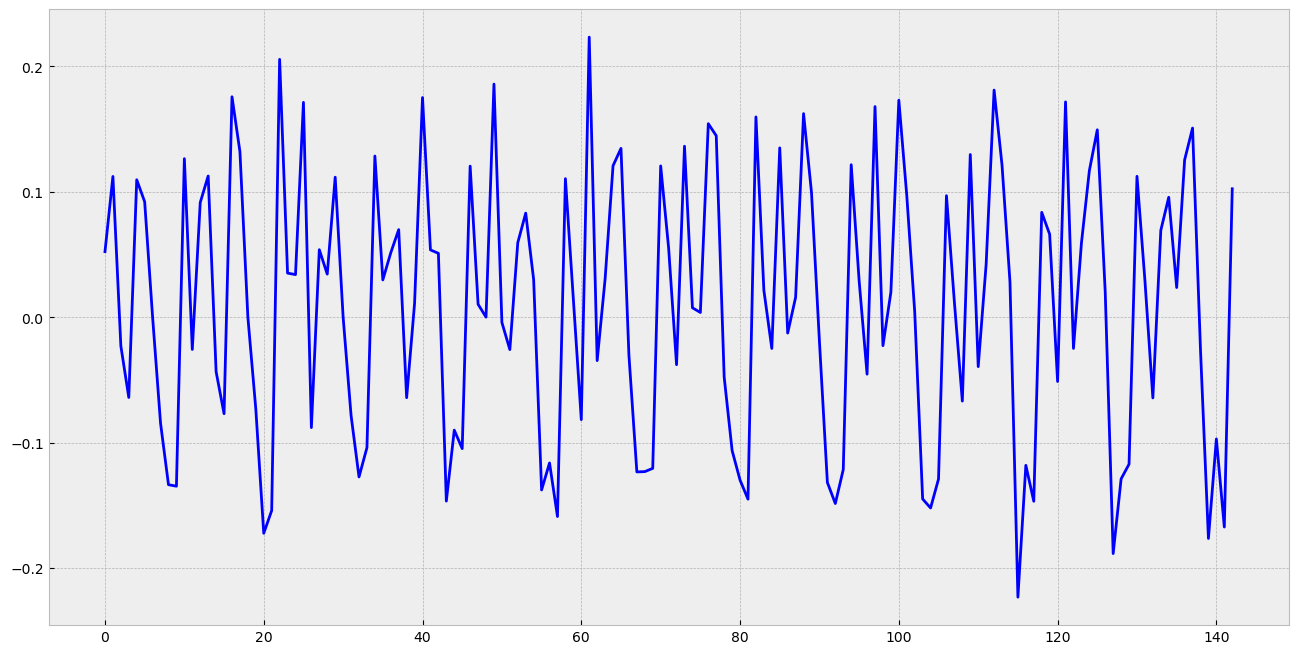

In [48]:
series = np.diff(series, 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

Проверю p-value:

Results of Dickey-Fuller Test:
Test Statistic                  -2.717131
p-value                          0.071121
#Lags Used                      14.000000
Number of Observations Used    128.000000
Critical Value (1%)             -3.482501
Critical Value (5%)             -2.884398
Critical Value (10%)            -2.578960
dtype: float64


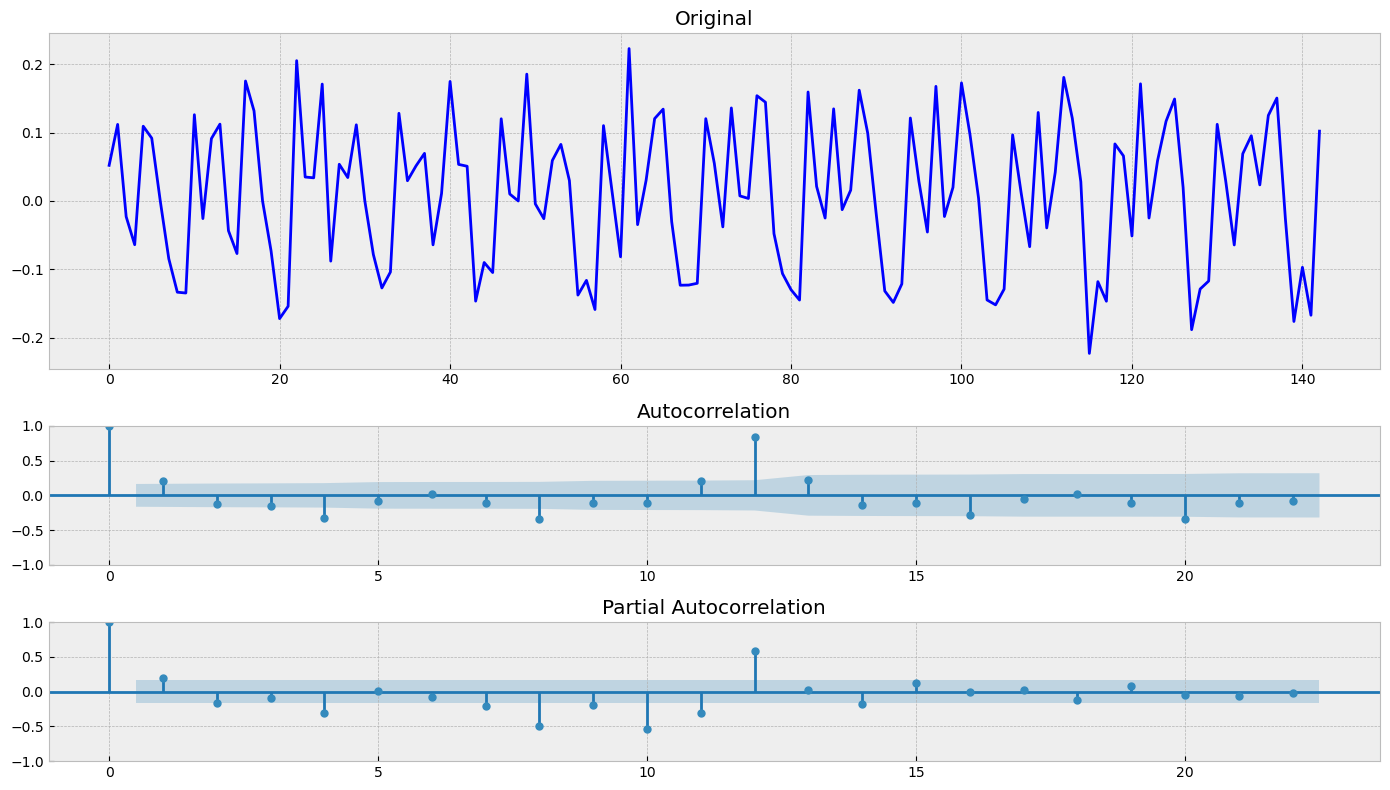

In [49]:
tsplot(series)

Надо ещё и избавиться от сезонности, теперь на графике автокорреляция она видна очень хорошо.

##### Убираем сезонность

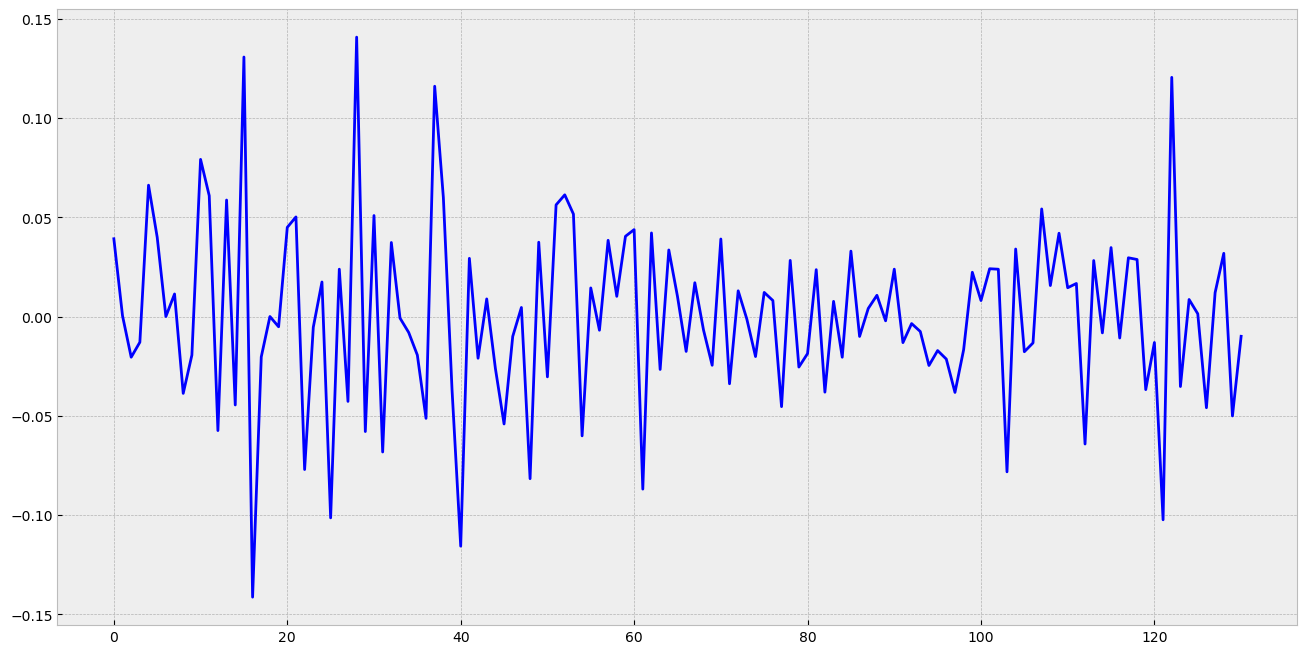

In [50]:
series = series[12:] - series[:-12]
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

Results of Dickey-Fuller Test:
Test Statistic                  -4.443325
p-value                          0.000249
#Lags Used                      12.000000
Number of Observations Used    118.000000
Critical Value (1%)             -3.487022
Critical Value (5%)             -2.886363
Critical Value (10%)            -2.580009
dtype: float64


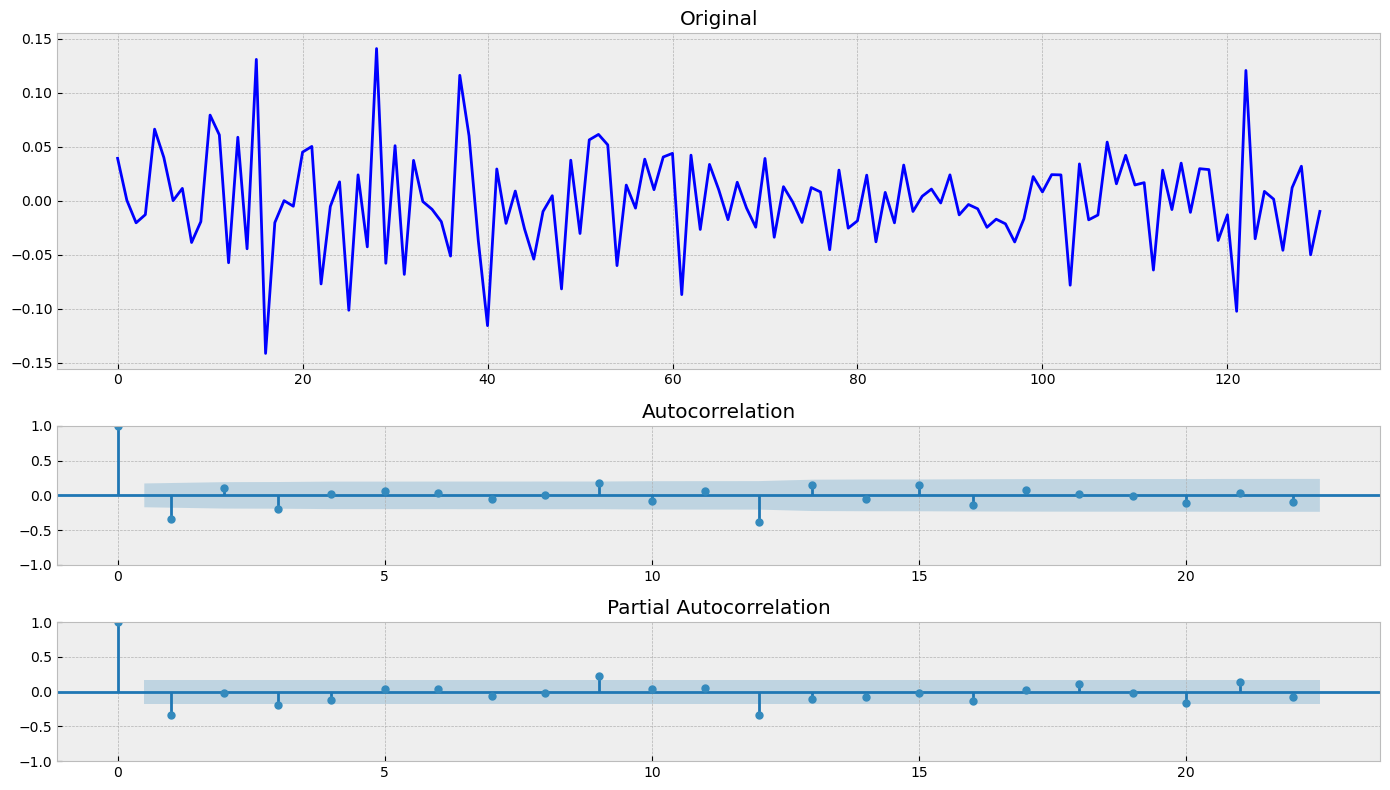

In [51]:
tsplot(series)

# 4. Mean monthly air temperature (Deg. F) Nottingham Castle

Results of Dickey-Fuller Test:
Test Statistic                  -3.255492
p-value                          0.016989
#Lags Used                      14.000000
Number of Observations Used    225.000000
Critical Value (1%)             -3.459752
Critical Value (5%)             -2.874473
Critical Value (10%)            -2.573663
dtype: float64


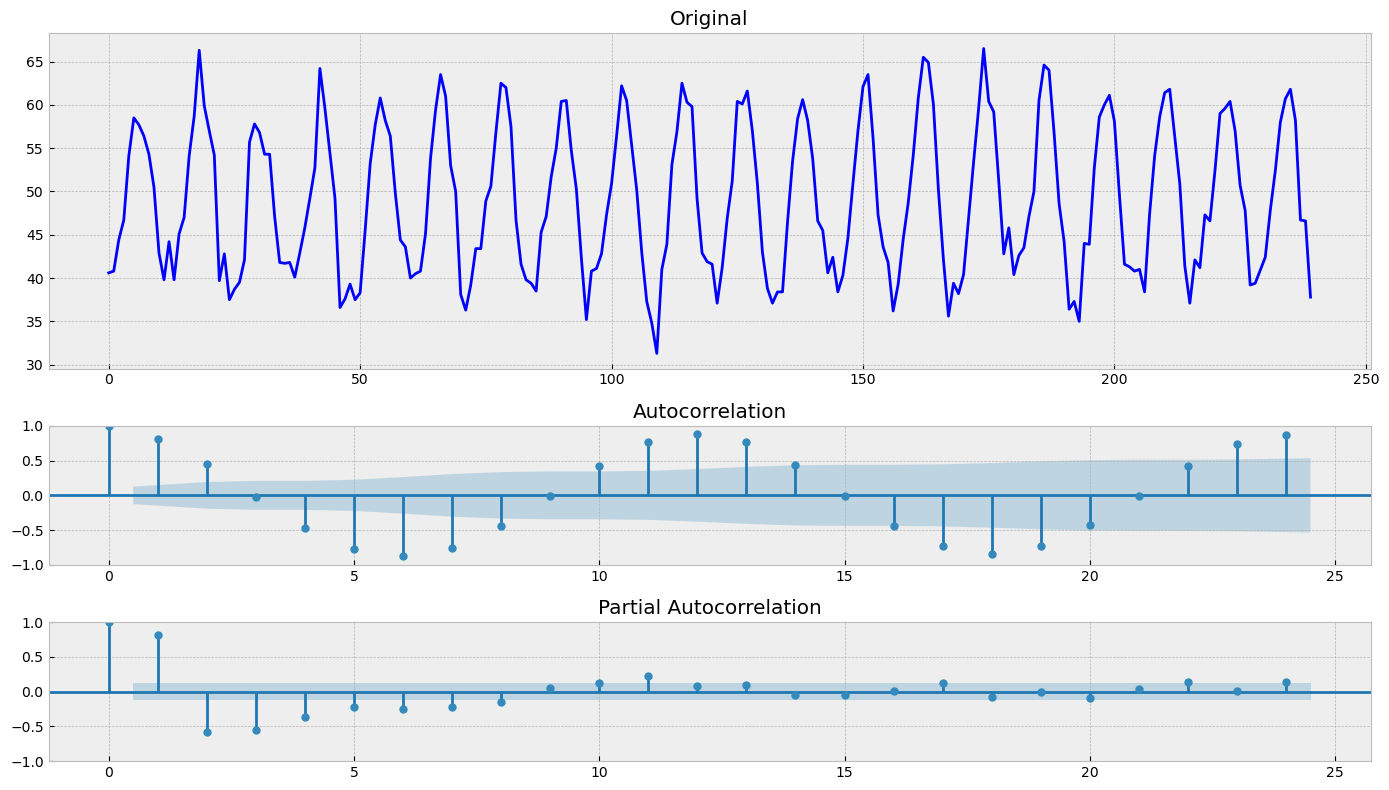

In [57]:
series = pd.read_csv("Series/mean-monthly-air-temperature-deg.csv")['Deg']
tsplot(series)

Ярко-выраженная цикличность (в общем логично, зима сменяет лето), тренда не вижу, неравномерной дисперсии тоже не вижу. Попробуем сразу избавиться от цикличности.

###### Дифференцируем

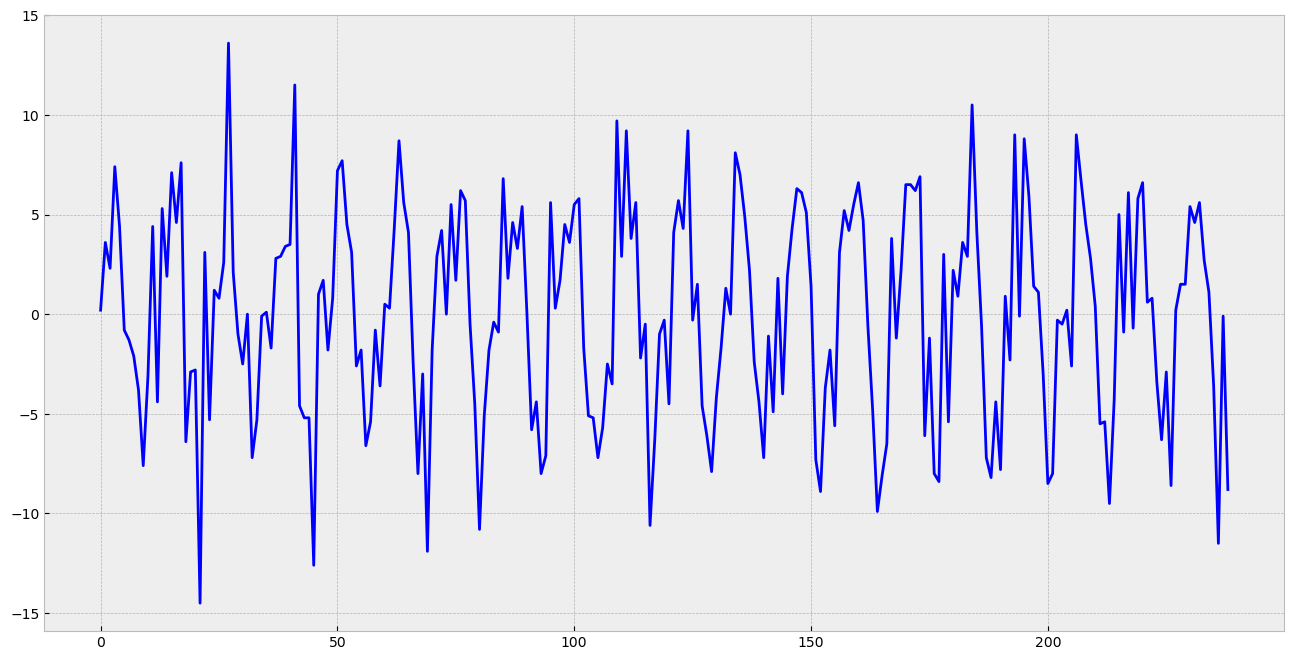

In [58]:
series = np.diff(series, 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

Проверяем:

Results of Dickey-Fuller Test:
Test Statistic                -1.225927e+01
p-value                        9.157883e-23
#Lags Used                     1.100000e+01
Number of Observations Used    2.270000e+02
Critical Value (1%)           -3.459490e+00
Critical Value (5%)           -2.874358e+00
Critical Value (10%)          -2.573602e+00
dtype: float64


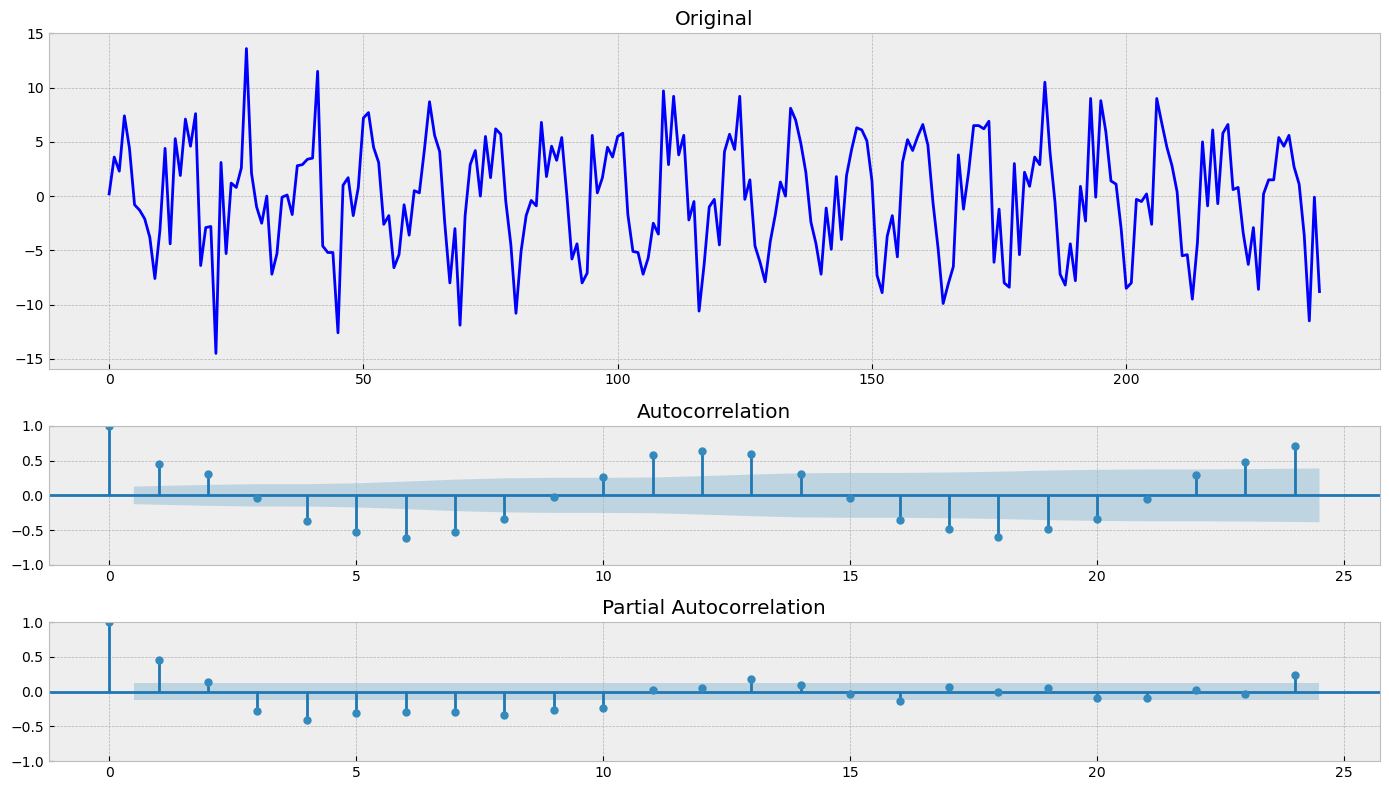

In [59]:
tsplot(series)

Сработало, p-value стремится к нулю.

# 5. Weekly closings of the Dow-Jones industrial average (Еженедельные закрытия промышленного индекса Доу-Джонса)

Results of Dickey-Fuller Test:
Test Statistic                  -1.314625
p-value                          0.622455
#Lags Used                       0.000000
Number of Observations Used    161.000000
Critical Value (1%)             -3.471633
Critical Value (5%)             -2.879665
Critical Value (10%)            -2.576434
dtype: float64


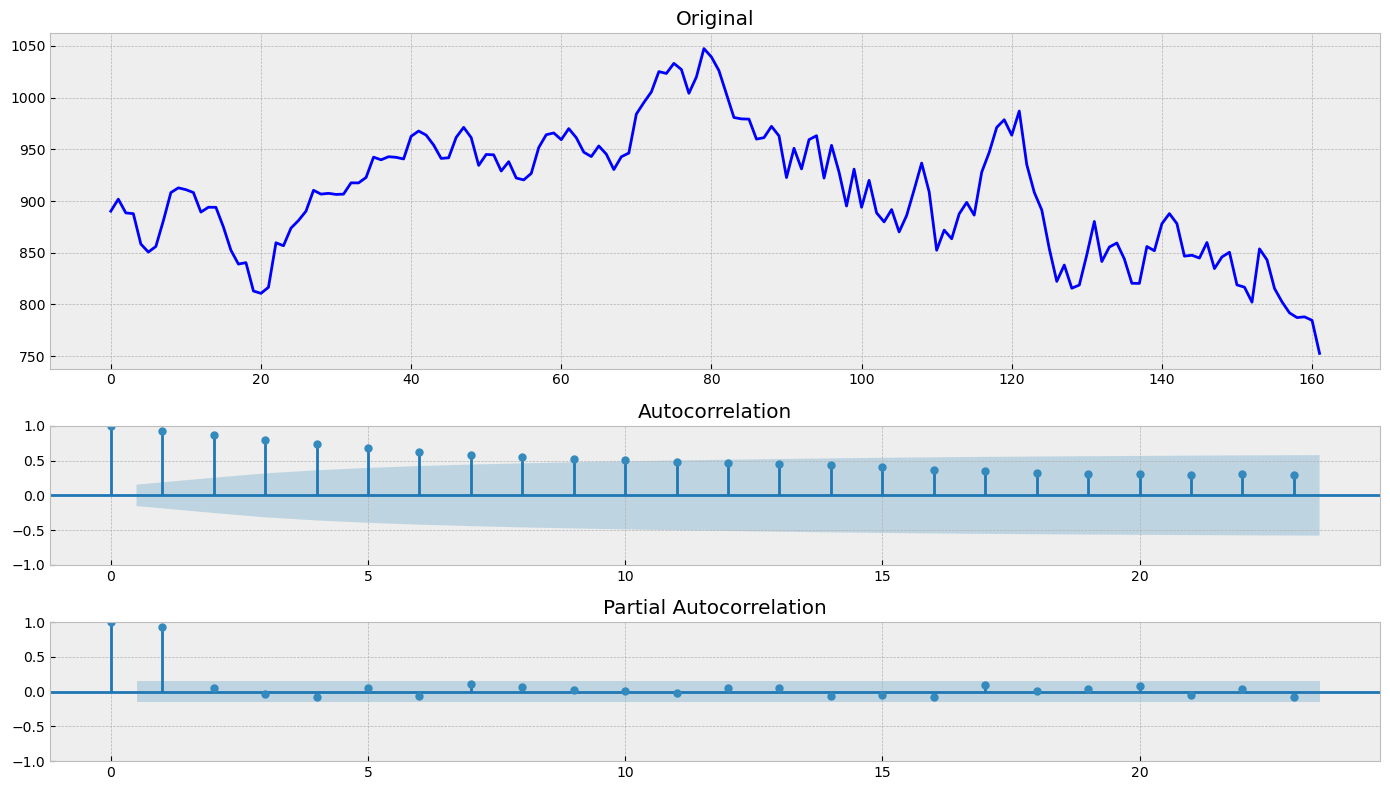

In [63]:
series = pd.read_csv("Series/weekly-closings-of-the-dowjones-.csv")['Close']
tsplot(series)

Как будто есть цикличность.

###### Дифференцируем

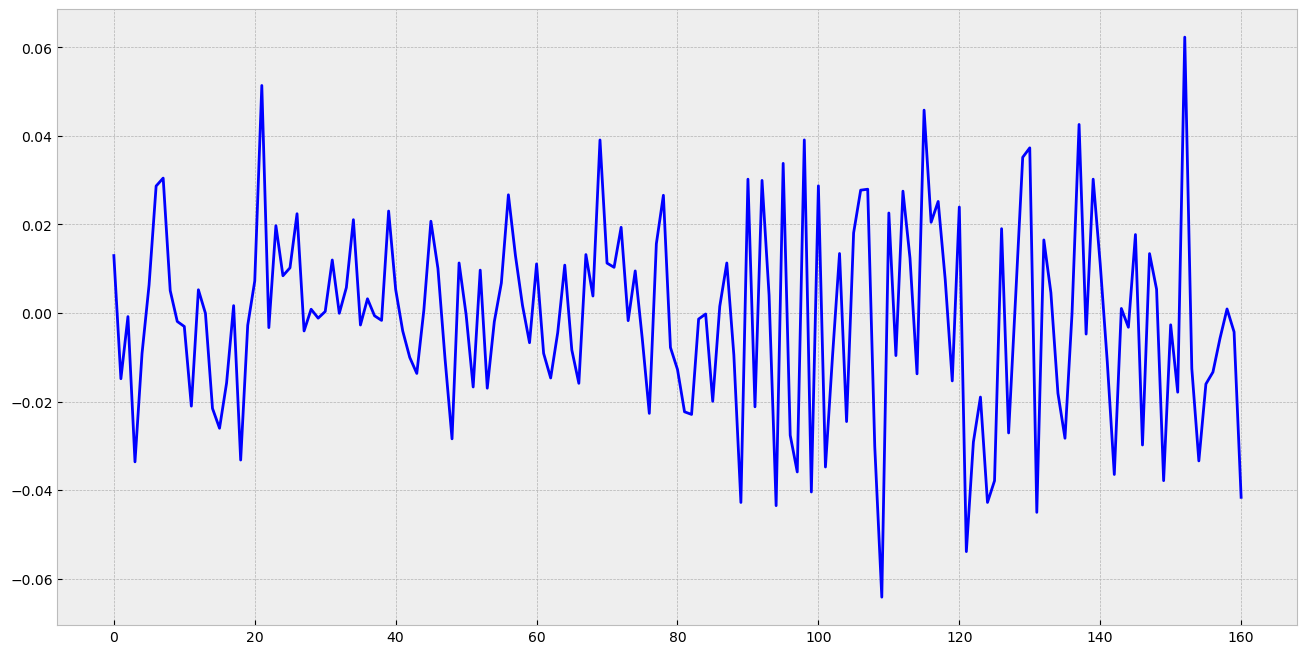

In [66]:
series = np.diff(series, 1)
with plt.style.context('bmh'):
        plt.figure(figsize=(16, 8))
        plt.plot(series, color='blue')

Проверяем:

Results of Dickey-Fuller Test:
Test Statistic                -1.299582e+01
p-value                        2.751609e-24
#Lags Used                     0.000000e+00
Number of Observations Used    1.600000e+02
Critical Value (1%)           -3.471896e+00
Critical Value (5%)           -2.879780e+00
Critical Value (10%)          -2.576495e+00
dtype: float64


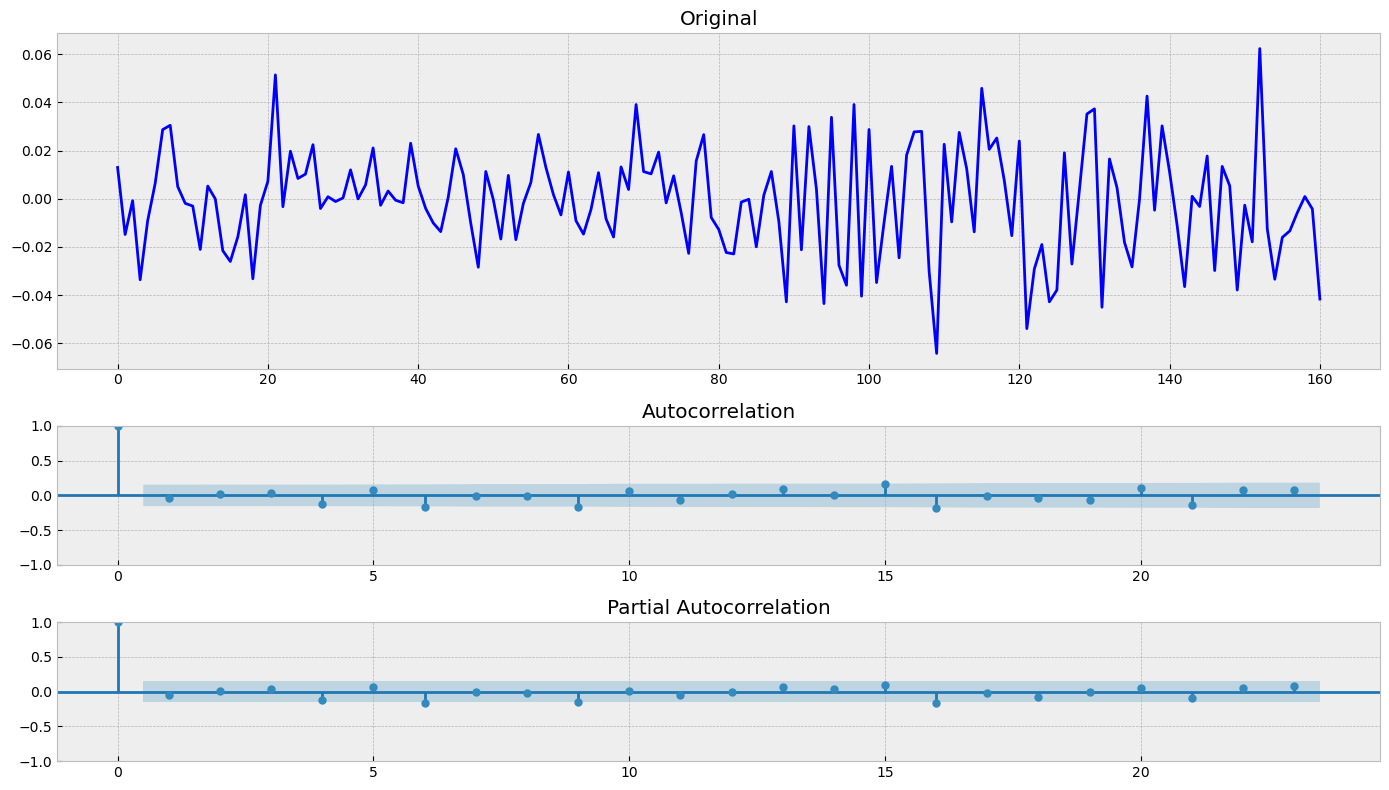

In [67]:
tsplot(series)

# 6.Daily total female births in California

Results of Dickey-Fuller Test:
Test Statistic                  -4.808291
p-value                          0.000052
#Lags Used                       6.000000
Number of Observations Used    358.000000
Critical Value (1%)             -3.448749
Critical Value (5%)             -2.869647
Critical Value (10%)            -2.571089
dtype: float64


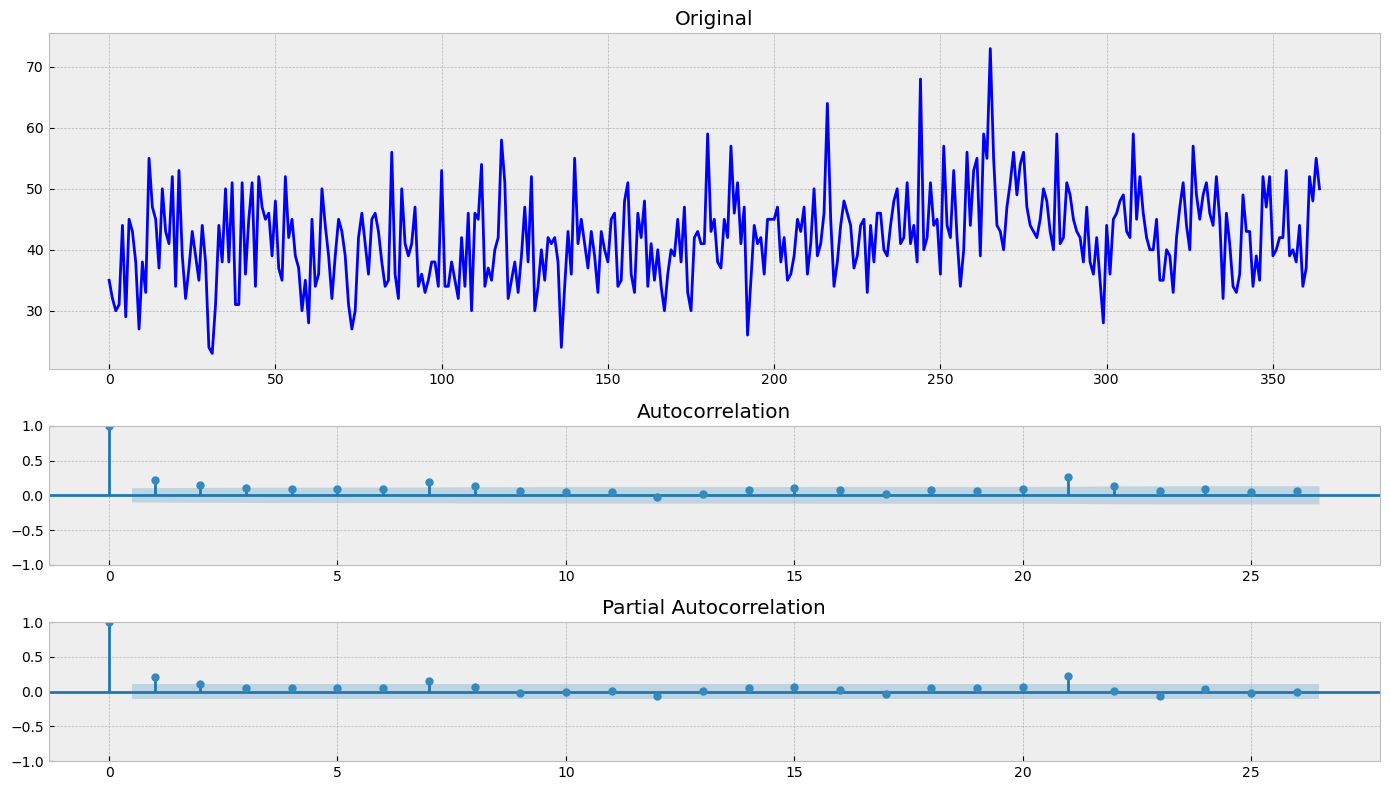

In [69]:
series = pd.read_csv("Series/daily-total-female-births-in-cal.csv")['Count']
tsplot(series)

Ничего не надо делать, p-value уже меньше 0.05, ряд является стационарным.